# Text Summarizer Webinar
___ 

### Project Background
The objective of this project is to develop a transcription and text summarizer that can be used to generate summaries for multi-speaker videos. As most of the webinars and panel discussion videos are at least an hour, users may prefer to read through a summary on the key topics and key threads discussed before deciding to invest their time in viewing the entire video. The summary could also provide the gist of the discussion and help the users to recap and reinforce their learning after viewing the video. We will be evaluating the current state-of-the-art tools in text transcription and leverage on the service that provides the best accuracy in transcribing webinars with speakers from Southeast Asian accent. Finally, we will be using OpenAI to customise the model for the text summarizer.

___

**Tutor**: *Dr Koh Noi Sian*

**By**: *Zhang Xiang*

**Course**: *DAAA*

**Admin No**: 210896X
___

### Data Understanding & Preparation

#### Flow
1. **Install & Import Necessary Libraries**

2. **Common Graph Function**

3. **Data Understanding**
     - Tib Dataset

              - train
              - test
              - validation

     - QMSUM Dataset
     
            - train
            - test
            - validation

     - BBC Dataset

            - train
            - test
            - validation

4. **Data Preparation**: Clean and Filter Data
     - Tib Dataset

              - train
              - test
              - validation

     - QMSUM Dataset
     
            - train
            - test
            - validation

     - BBC Dataset

            - train
            - test
            - validation

4. **Actual Sample Dataset Exploration**

     - Words
       
     - Chars


#### Install & Import Necessary Libraries

In [22]:
# !pip install pandas langchain selenium pyperclip openpyxl
# !pip install matplotlib seaborn
# !pip install datasets

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from datasets import load_dataset
from sklearn.model_selection import train_test_split


from ast import literal_eval
import os

#### Common Graph Function

In [40]:
def plot_word_count_statistics(df_tib):
    print(df_tib.shape)
    
    # retrieve word count from text and summary
    text_word_counts = df_tib['transcript'].str.split().apply(len)
    summary_word_counts = df_tib['summary'].str.split().apply(len)

    summary_stats = {
        'Min': summary_word_counts.min(),
        'Mean': summary_word_counts.mean(),
        'Max': summary_word_counts.max(),
        'Count': len(summary_word_counts)
    }

    text_stats = {
        'Min': text_word_counts.min(),
        'Mean': text_word_counts.mean(),
        'Max': text_word_counts.max(),
        'Count': len(text_word_counts)
    }

    text_df = pd.DataFrame(text_stats, index=['Original'])
    summary_df = pd.DataFrame(summary_stats, index=['Summary'])

    result_df = pd.concat([text_df, summary_df])
    print(result_df)

    result_df.plot(kind='bar')
    plt.ylabel('Count')
    plt.title('Statistics of Word Counts')
    plt.show()

In [41]:
# Plot Histogram on Word Count
def plot_word_length_histograms(df):
    text_lengths = [len(x.split(" ")) for x in df['transcript']]
    summary_lengths = [len(x.split(" ")) for x in df['summary']]

    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    sns.histplot(text_lengths, bins=20, ax=axes[0])
    axes[0].set_title("Original Text Length Distribution")

    sns.histplot(summary_lengths, bins=20, ax=axes[1])
    axes[1].set_title("Summary Text Length Distribution")

    plt.tight_layout()
    plt.show()

#### Data Understanding

##### TIB Dataset

In [10]:

dataset = load_dataset("gigant/tib")

df_tib_train = pd.DataFrame()
df_tib_train["text"] = dataset['train']['transcript']
df_tib_train["summary"] = dataset['train']['abstract']


df_tib_train.head()

,text,summary
0,Railroad cars. Very heavy springs. Okay. So l...,Professor de Cooman takes the topic of rod and...
1,Hello. Hello. Hi. Yeah. Hi. Can you hear me? ...,"In FOSDEM 2013, Open Robotics introduced an ov..."
2,"I don't know how about you, but whenever I st...",How to build a pinball machine? We introduce y...
3,Today's topic is going to be differential pri...,Differential privacy is a mathematically rigor...
4,"Good morning. Well, I am really happy today. ...",UCI Chem 51C Organic Chemistry (Spring 2012) L...


In [11]:
df_tib_train = pd.DataFrame()
df_tib_test = pd.DataFrame()
df_tib_val = pd.DataFrame()


df_tib_train["summary"] = dataset['train']['abstract']
df_tib_train["transcript"] = dataset['train']['transcript']

df_tib_test["summary"] = dataset['test']['abstract']
df_tib_test["transcript"] = dataset['test']['transcript']

df_tib_val["summary"] = dataset['valid']['abstract']
df_tib_val["transcript"] = dataset['valid']['transcript']

##### Train

(7282, 2)
          Min         Mean    Max  Count
Original   78  5267.776984  30044   7282
Summary     3   141.262565    909   7282


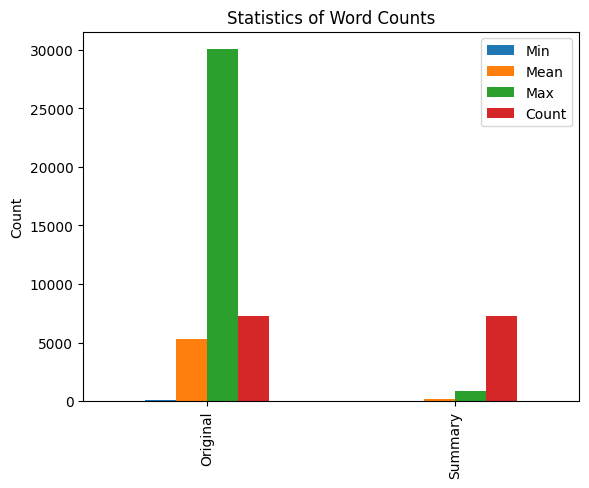

KeyboardInterrupt: 

In [19]:
plot_word_count_statistics(df_tib_train)
plot_word_length_histograms(df_tib_train)


##### Test

(911, 2)
          Min         Mean    Max  Count
Original  155  5266.953897  20107    911
Summary     4   139.170143    791    911


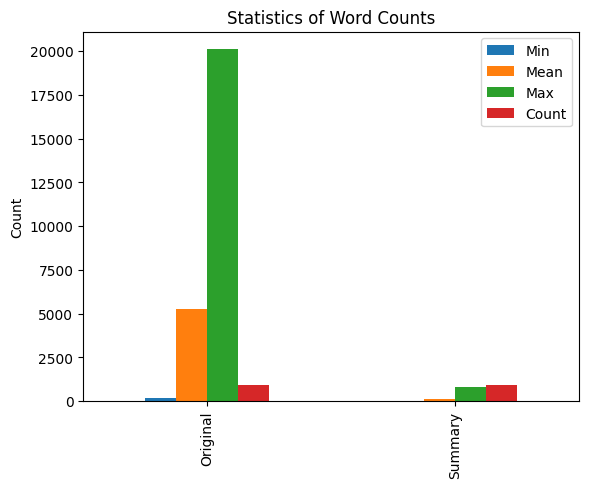

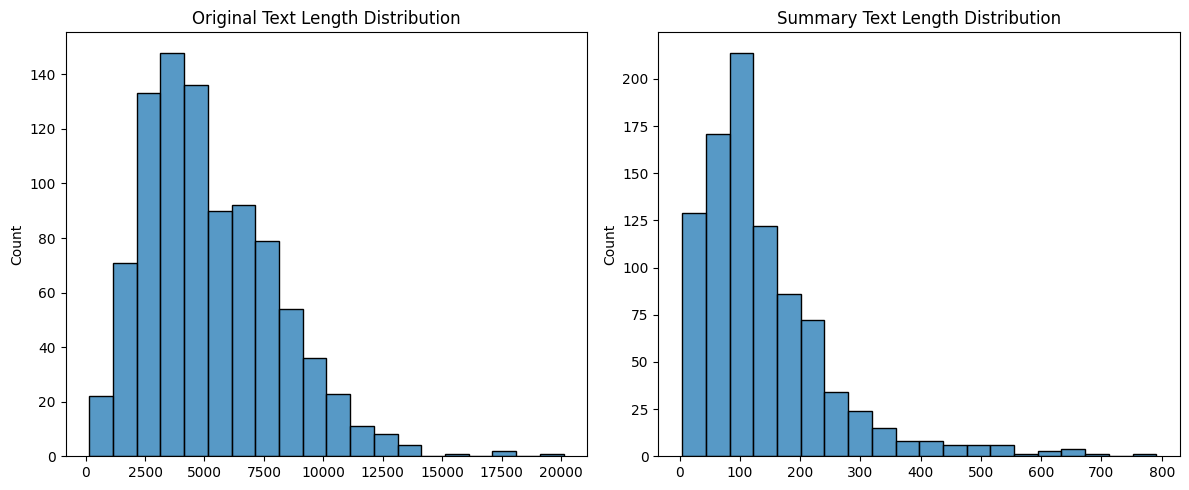

In [29]:
plot_word_count_statistics(df_tib_test)
plot_word_length_histograms(df_tib_test)


##### Validation

(910, 2)
          Min         Mean    Max  Count
Original   48  5250.250549  27966    910
Summary     5   136.272527    771    910


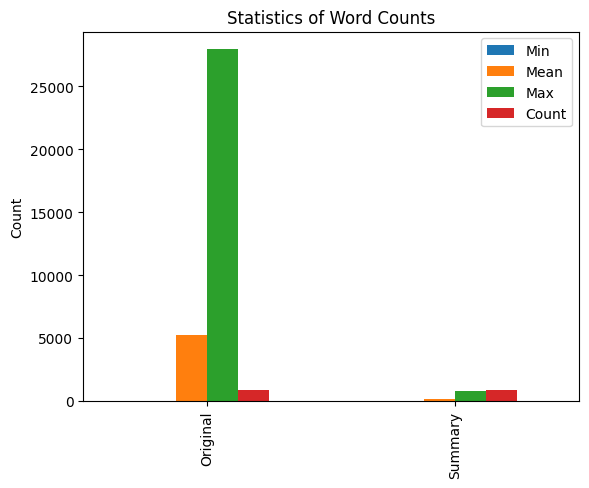

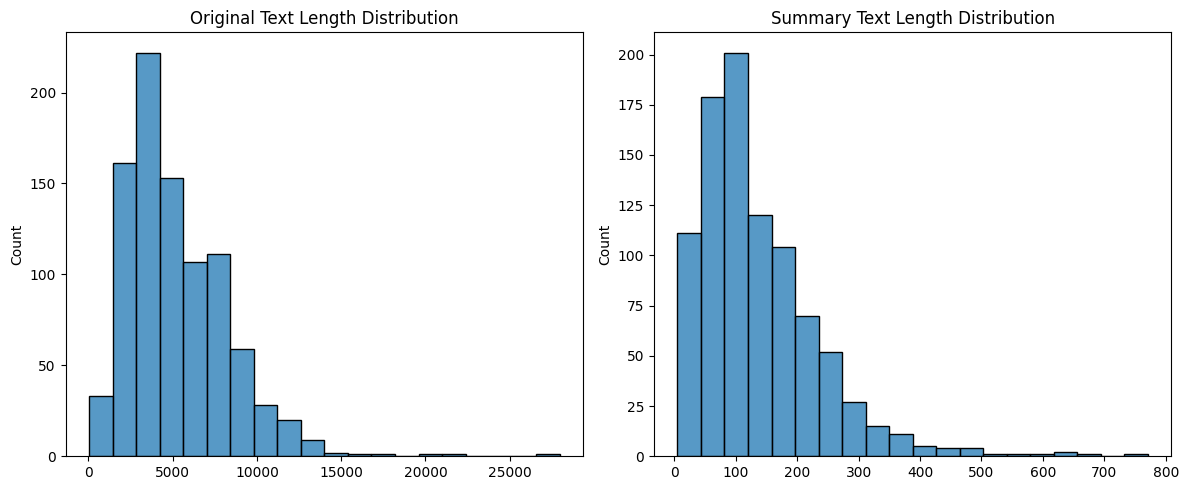

In [30]:
plot_word_count_statistics(df_tib_val)
plot_word_length_histograms(df_tib_val)


###   QSUM Dataset

In [31]:
dataset_qmsum = load_dataset('Salesforce/dialogstudio', 'QMSum')

dataset_qmsum

DatasetDict({
    train: Dataset({
        features: ['original dialog id', 'new dialog id', 'dialog index', 'original dialog info', 'log', 'prompt'],
        num_rows: 162
    })
    validation: Dataset({
        features: ['original dialog id', 'new dialog id', 'dialog index', 'original dialog info', 'log', 'prompt'],
        num_rows: 35
    })
    test: Dataset({
        features: ['original dialog id', 'new dialog id', 'dialog index', 'original dialog info', 'log', 'prompt'],
        num_rows: 35
    })
})

##### Train

(162, 2)
           Min          Mean    Max  Count
Original  1241  10525.049383  28170    162
Summary     49    111.098765    238    162


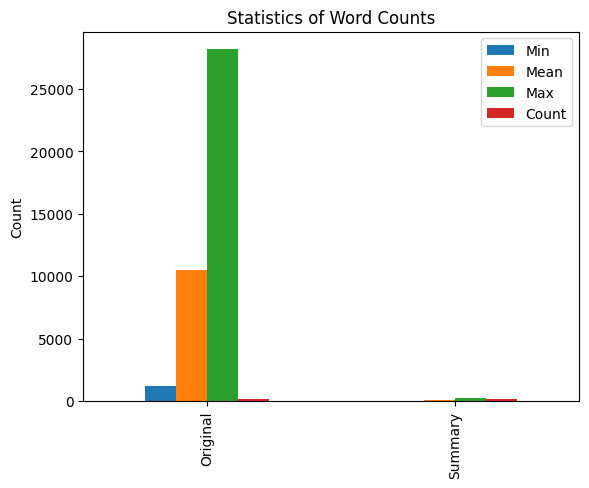

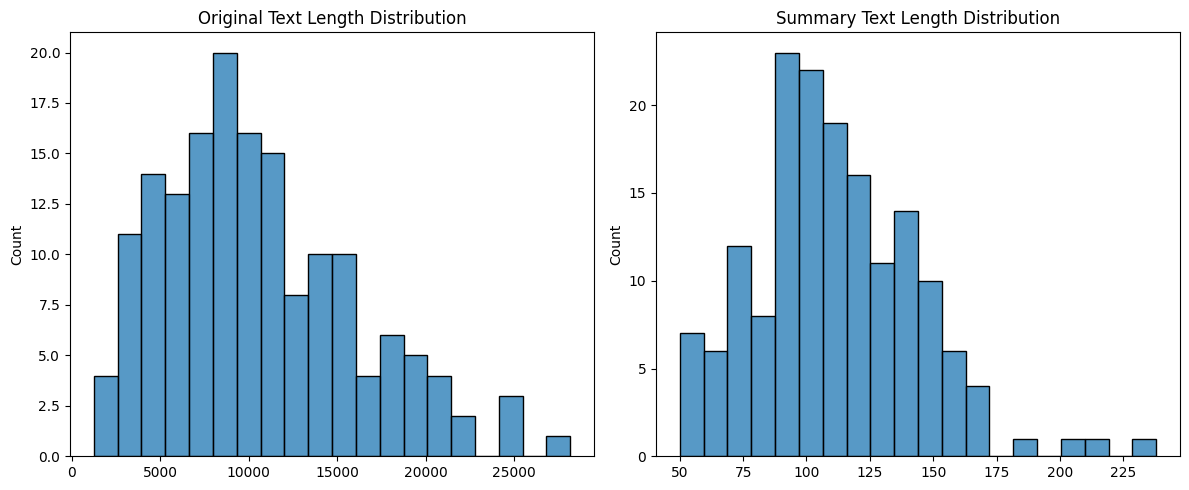

In [32]:
df_qmsum_train = pd.DataFrame()
df_qmsum_train['transcript'] = [literal_eval(x['original dialog info']) for x in dataset_qmsum['train']]
df_qmsum_train['summary'] = [x['general_query_list'][0]["answer"] for x in df_qmsum_train['transcript']]
df_qmsum_train['transcript'] = [" ".join(x['dialog history']) for x in df_qmsum_train['transcript']]

plot_word_count_statistics(df_qmsum_train)
plot_word_length_histograms(df_qmsum_train)

##### Test

(35, 2)
           Min          Mean    Max  Count
Original  2853  11233.742857  26612     35
Summary     68    110.342857    188     35


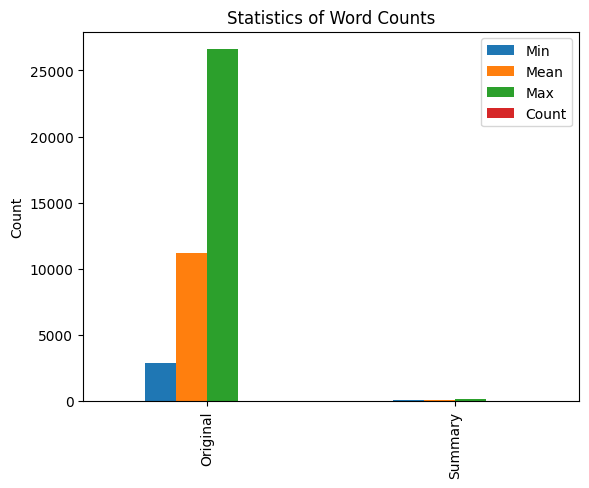

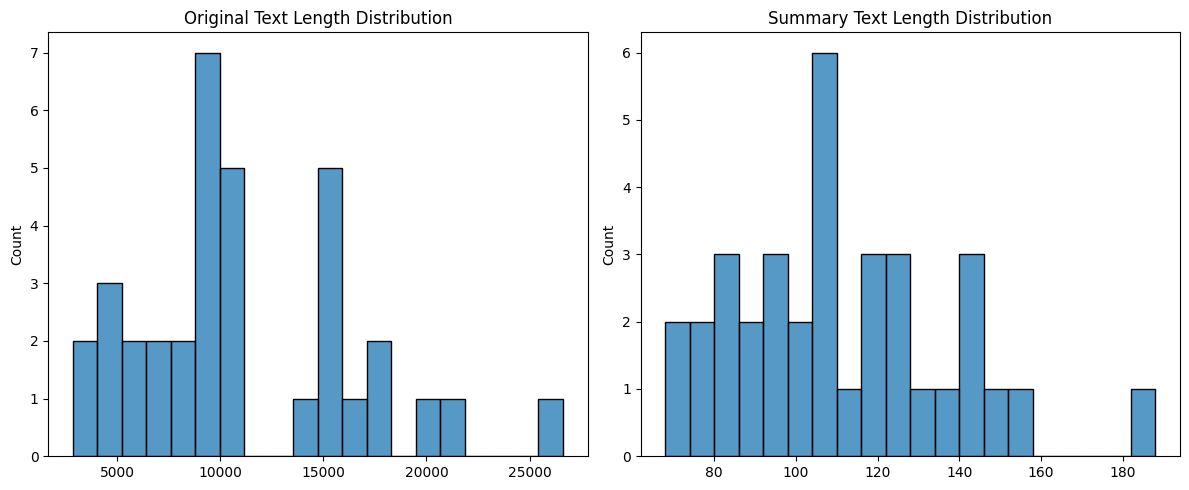

In [33]:
df_qmsum_test = pd.DataFrame()
df_qmsum_test['transcript'] = [literal_eval(x['original dialog info']) for x in dataset_qmsum['test']]
df_qmsum_test['summary'] = [x['general_query_list'][0]["answer"] for x in df_qmsum_test['transcript']]
df_qmsum_test['transcript'] = [" ".join(x['dialog history']) for x in df_qmsum_test['transcript']]

plot_word_count_statistics(df_qmsum_test)
plot_word_length_histograms(df_qmsum_test)

(35, 2)
           Min          Mean    Max  Count
Original  2853  11233.742857  26612     35
Summary     68    110.342857    188     35


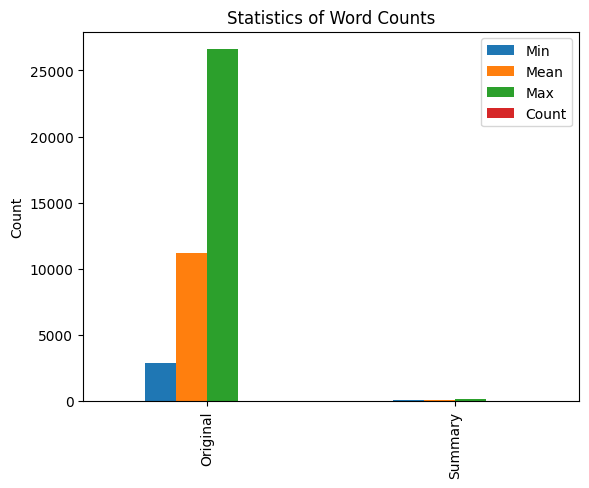

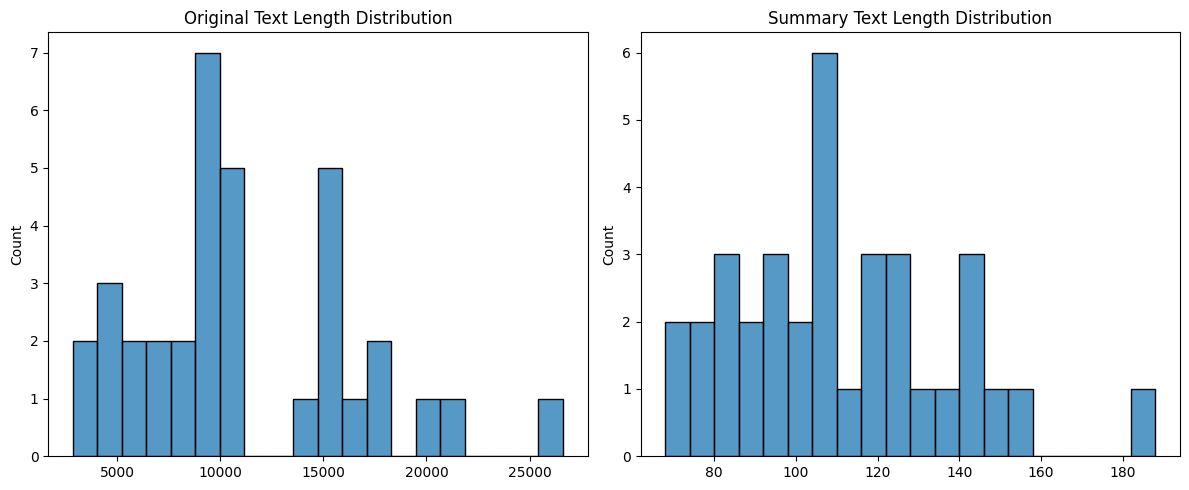

In [34]:
df_qmsum_val = pd.DataFrame()
df_qmsum_val['transcript'] = [literal_eval(x['original dialog info']) for x in dataset_qmsum['validation']]
df_qmsum_val['summary'] = [x['general_query_list'][0]["answer"] for x in df_qmsum_val['transcript']]
df_qmsum_val['transcript'] = [" ".join(x['dialog history']) for x in df_qmsum_val['transcript']]

plot_word_count_statistics(df_qmsum_val)
plot_word_length_histograms(df_qmsum_val)


#### BBC DATASET

In [27]:
dataset_bbc = load_dataset('gopalkalpande/bbc-news-summary')
dataset_bbc

Extracting data files: 100%|██████████| 1/1 [00:00<00:00, 333.60it/s]
Generating train split: 2224 examples [00:00, 12020.40 examples/s]


DatasetDict({
    train: Dataset({
        features: ['File_path', 'Articles', 'Summaries'],
        num_rows: 2224
    })
})

In [45]:
data =pd.DataFrame(dataset_bbc['train'])

# Prepare Train Test & Validation Split
df_bbc_train, df_bbc_test = train_test_split(data, test_size=0.3, random_state=42)
df_bbc_test, df_bbc_val = train_test_split(df_bbc_test, test_size=0.5, random_state=42)

df_bbc_train["transcript"] = df_bbc_train['Articles']
df_bbc_train["summary"] = df_bbc_train['Summaries']

df_bbc_test["transcript"] = df_bbc_test['Articles']
df_bbc_test["summary"] = df_bbc_test['Summaries']

df_bbc_val["transcript"] = df_bbc_val['Articles']
df_bbc_val["summary"] = df_bbc_val['Summaries']

##### Train

(1556, 5)
          Min        Mean   Max  Count
Original  111  381.074550  3408   1556
Summary    40  166.493573  1706   1556


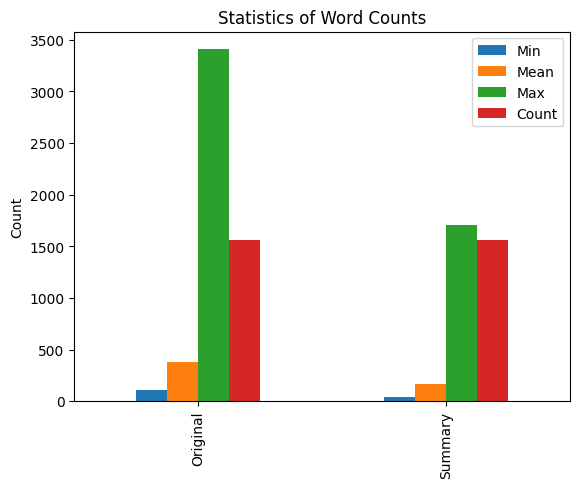

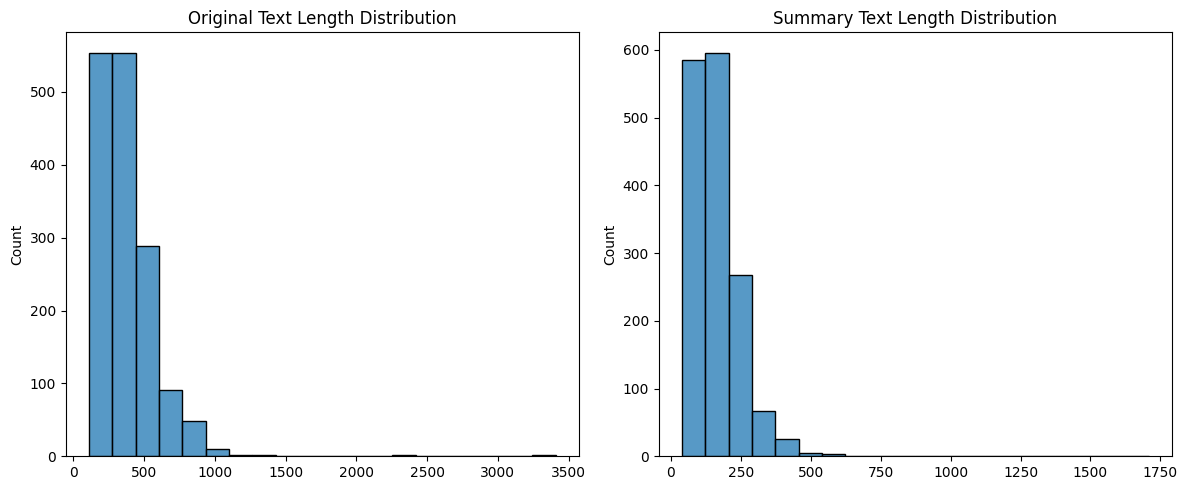

In [46]:
plot_word_count_statistics(df_bbc_train)
plot_word_length_histograms(df_bbc_train)

##### Test

(334, 5)
          Min        Mean   Max  Count
Original   87  373.997006  4377    334
Summary    38  162.359281  2073    334


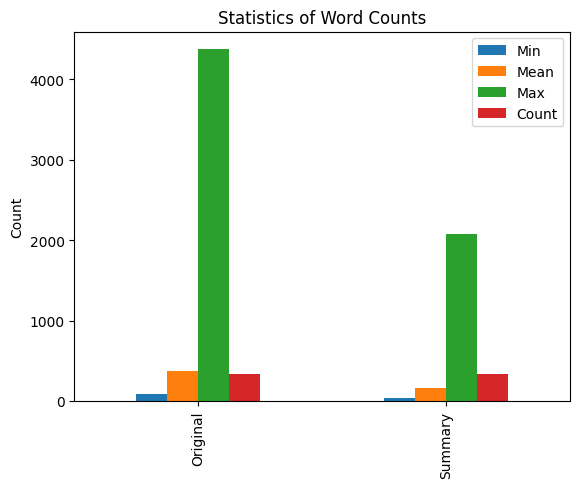

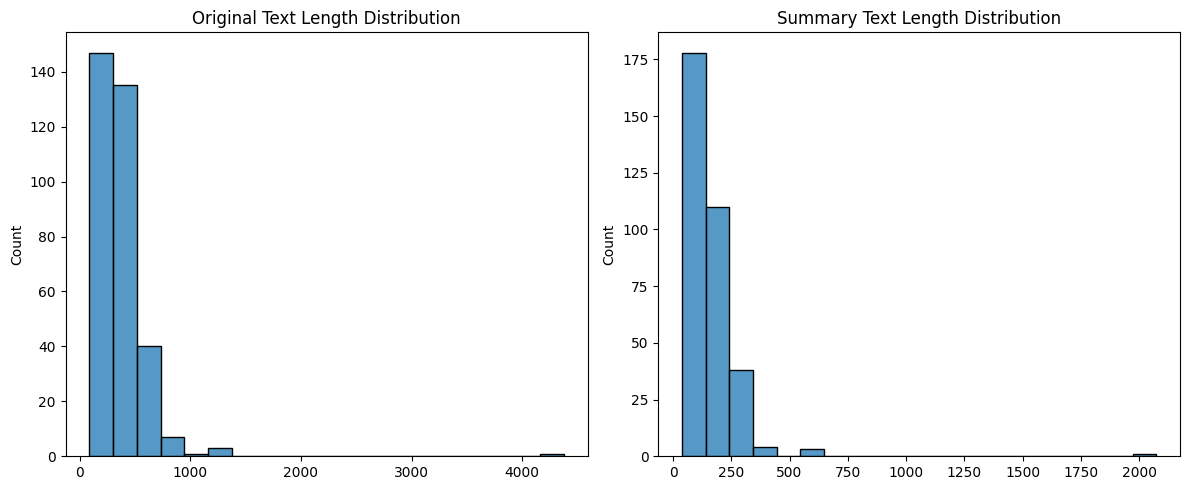

In [47]:
plot_word_count_statistics(df_bbc_test)
plot_word_length_histograms(df_bbc_test)

##### Validation

(334, 5)
          Min        Mean   Max  Count
Original  107  376.248503  2347    334
Summary    44  161.691617  1048    334


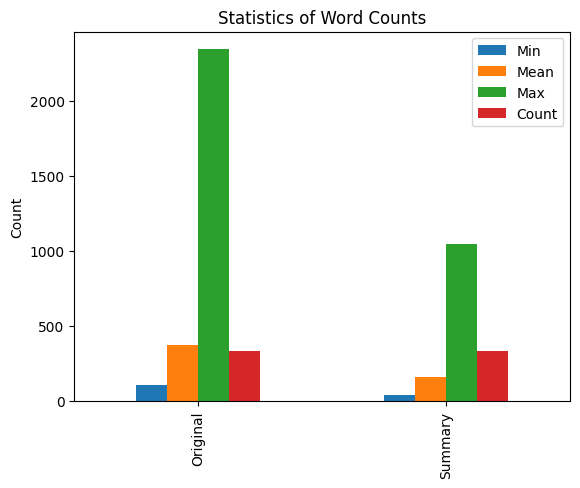

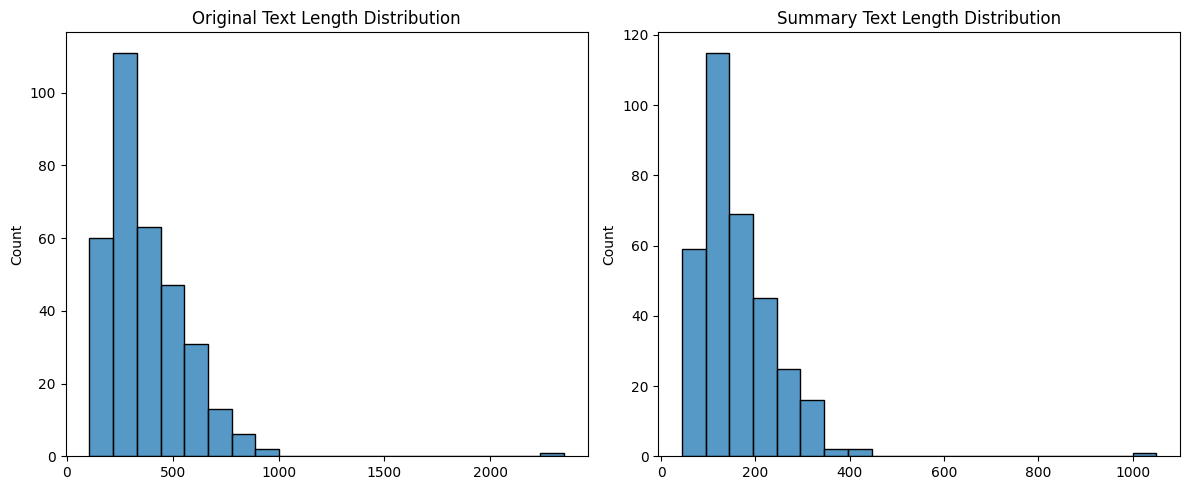

In [48]:
plot_word_count_statistics(df_bbc_val)
plot_word_length_histograms(df_bbc_val)

#### CNN DATASET (POLITICS) - Not Using

Might take awhile dataset is quite big

In [25]:
# df_cnn_train = pd.read_csv("../Data/newscnn_train.csv")
# df_cnn_test = pd.read_csv("../Data/newscnn_test.csv")
# df_cnn_val = pd.read_csv("../Data/newscnn_val.csv")


# df_cnn_train["summary"] = df_cnn_train['article']
# df_cnn_train["transcript"] = df_cnn_train['highlights']

# df_cnn_test["summary"] = df_cnn_test['article']
# df_cnn_test["transcript"] = df_cnn_test['highlights']

# df_cnn_val["summary"] = df_cnn_val['article']
# df_cnn_val["transcript"] = df_cnn_val['highlights']

### Data Preparation

#### TIB DATASET

In [35]:
# Filter function to retrieve ideal length of transcript and summary
def filter_dataframe(df):
    text_lengths = df['transcript'].apply(lambda x: len(x.split(" ")))
    summary_lengths = df['summary'].apply(lambda x: len(x.split(" ")))

    filtered_df = df[(text_lengths > 8000) & (summary_lengths > 150) & (summary_lengths < 300)]
    return filtered_df.reset_index(drop=True)

##### Train

(241, 2)
           Min          Mean    Max  Count
Original  8014  10159.813278  30044    241
Summary    151    209.489627    299    241


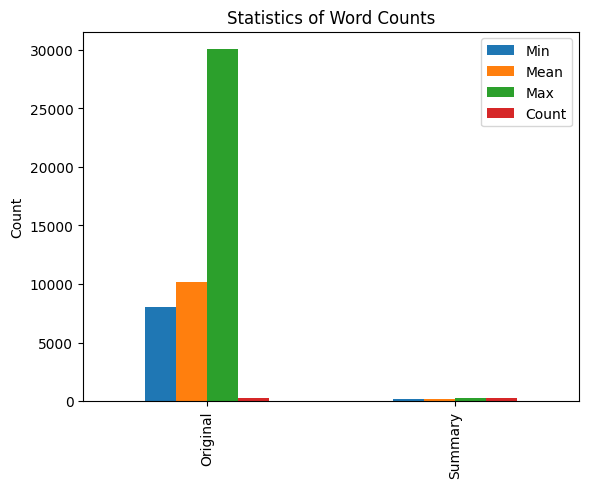

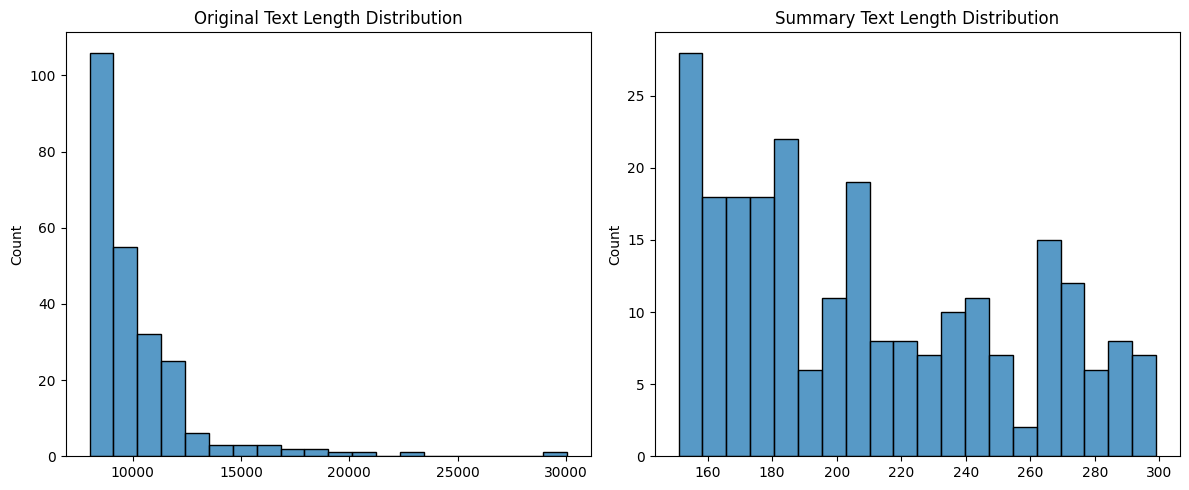

In [36]:
# Filter text length
df_tib_filtered = filter_dataframe(df_tib_train)

# Plot graph after filter
plot_word_count_statistics(df_tib_filtered)
plot_word_length_histograms(df_tib_filtered)

# Output filtered data for development
df_tib_filtered.to_excel("../Data/tib_train.xlsx", index=False)


(35, 2)
           Min         Mean    Max  Count
Original  8001  9800.600000  13084     35
Summary    151   213.628571    287     35


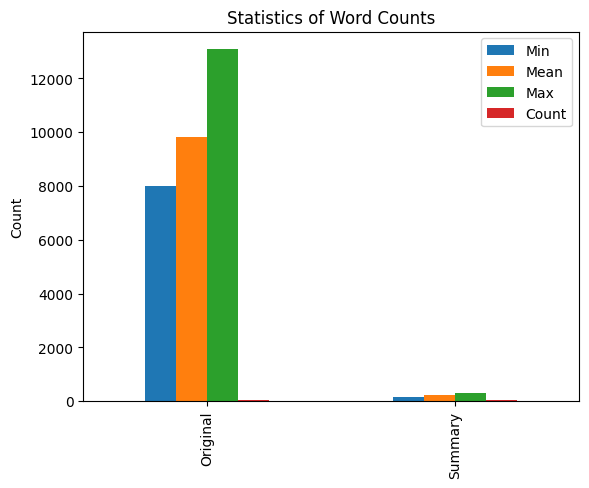

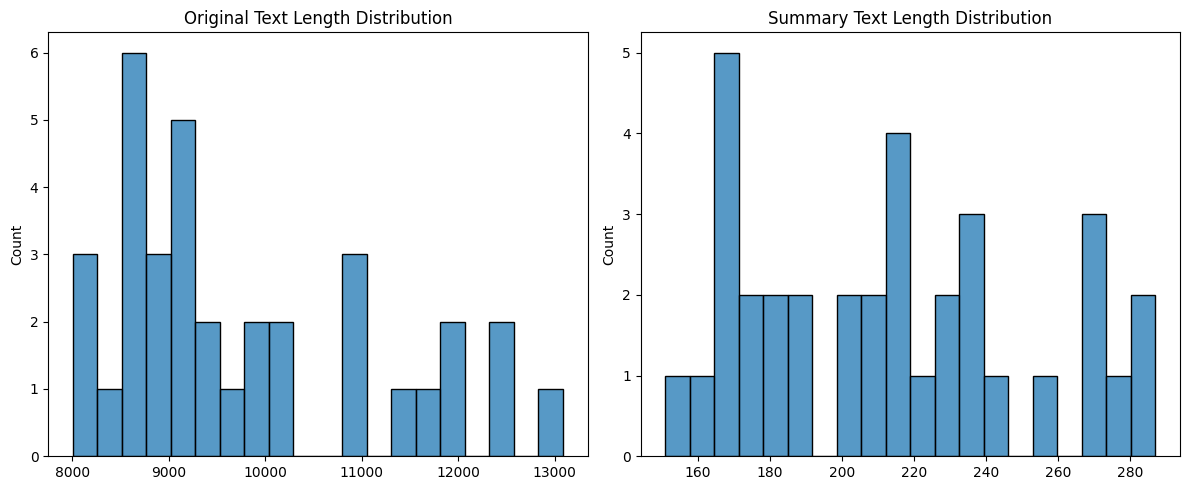

In [38]:
# Filter text length
df_tib_filtered = filter_dataframe(df_tib_test)

# Plot graph after filter
plot_word_count_statistics(df_tib_filtered)
plot_word_length_histograms(df_tib_filtered)

# Output filtered data for development
df_tib_filtered.to_excel("../Data/tib_test.xlsx", index=False)

(39, 2)
           Min         Mean    Max  Count
Original  8029  9962.564103  22032     39
Summary    155   200.871795    297     39


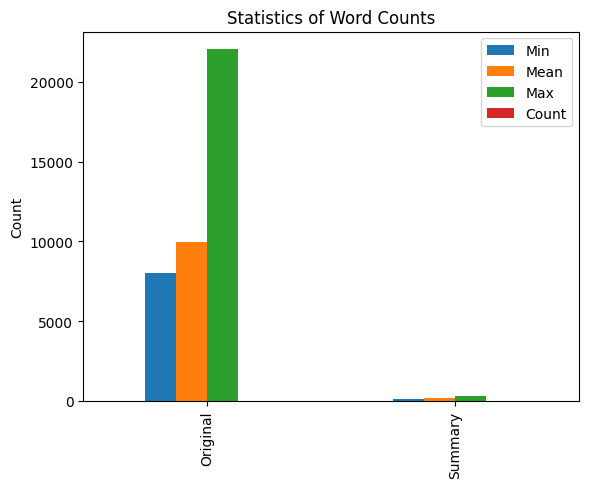

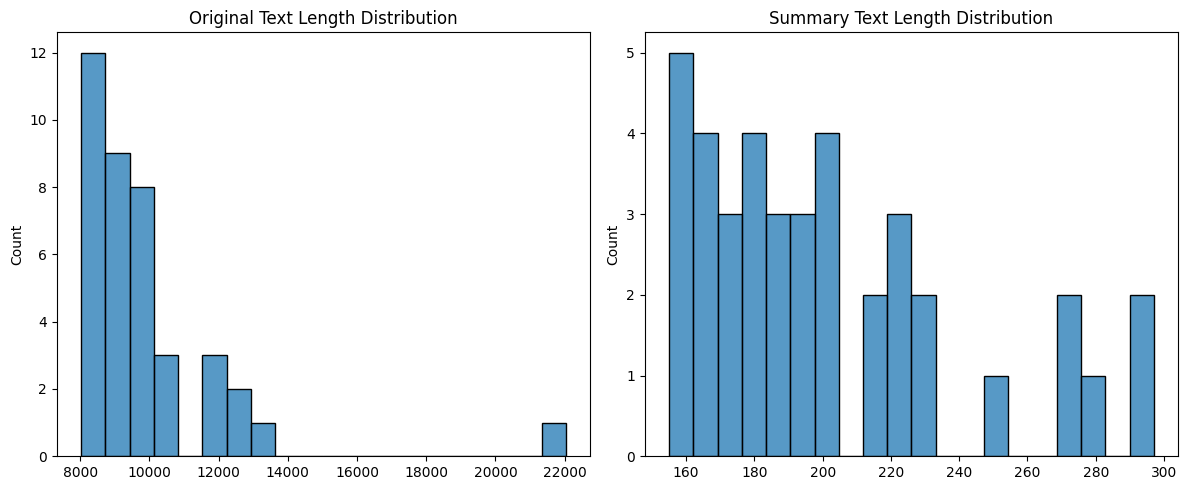

In [39]:
# Filter text length
df_tib_filtered = filter_dataframe(df_tib_val)

# Plot graph after filter
plot_word_count_statistics(df_tib_filtered)
plot_word_length_histograms(df_tib_filtered)

# Output filtered data for development
df_tib_filtered.to_excel("../Data/tib_val.xlsx", index=False)

#### QMSUM DATASET

In [50]:
# Filter function to retrieve ideal length of transcript and summary
# Every Dataset have different data so length of text have to adapt to it.
def filter_dataframe(df):
    text_lengths = df['transcript'].apply(lambda x: len(x.split(" ")))
    summary_lengths = df['summary'].apply(lambda x: len(x.split(" ")))

    filtered_df = df[(text_lengths > 8000) & (summary_lengths > 100) & (summary_lengths < 300)]
    return filtered_df.reset_index(drop=True)

(66, 2)
           Min          Mean    Max  Count
Original  8276  13187.651515  28170     66
Summary     99    130.818182    238     66


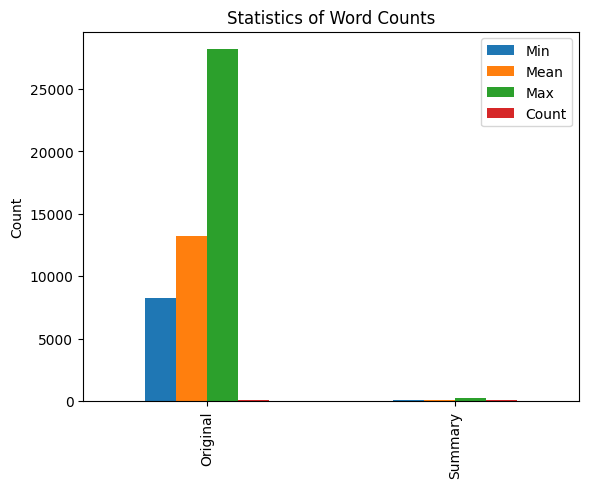

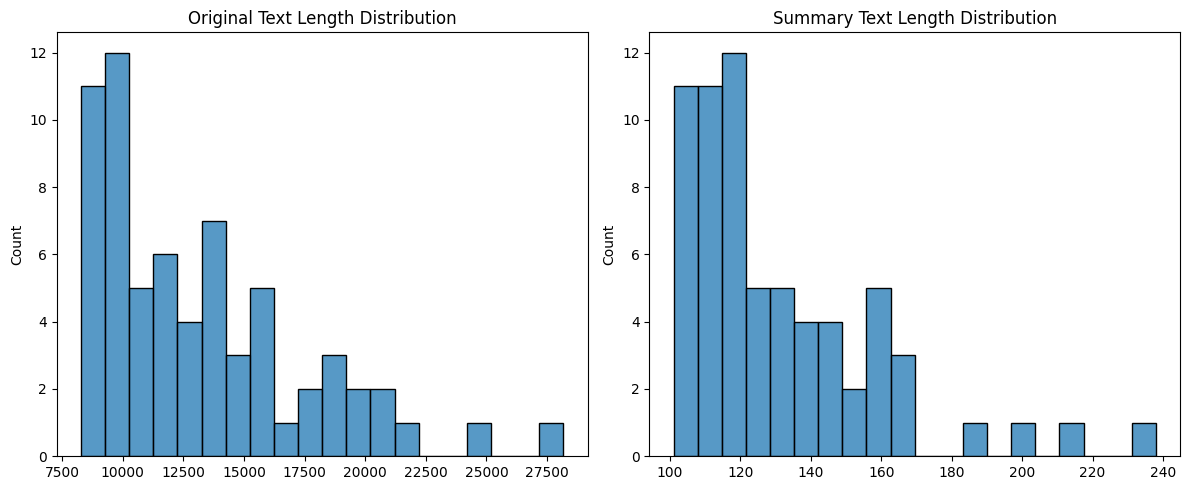

In [51]:
# Filter text length
df_qmsum_filtered = filter_dataframe(df_qmsum_train)

# Plot graph after filter
plot_word_count_statistics(df_qmsum_filtered)
plot_word_length_histograms(df_qmsum_filtered)

# Output filtered data for development
df_qmsum_filtered.to_excel("../Data/qmsum_train.xlsx", index=False)

(16, 2)
           Min        Mean    Max  Count
Original  9024  12826.2500  19932     16
Summary    104    128.1875    188     16


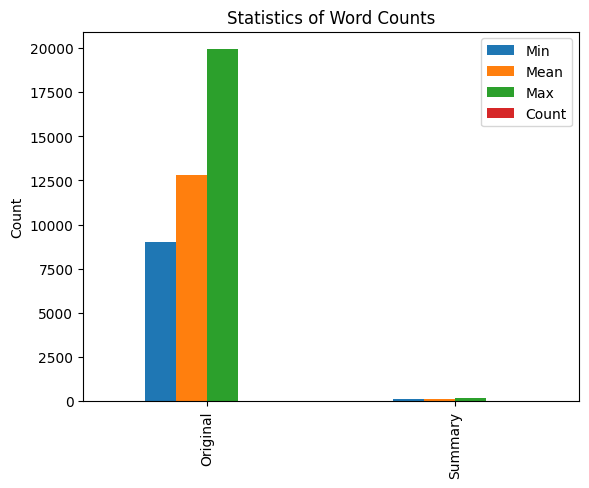

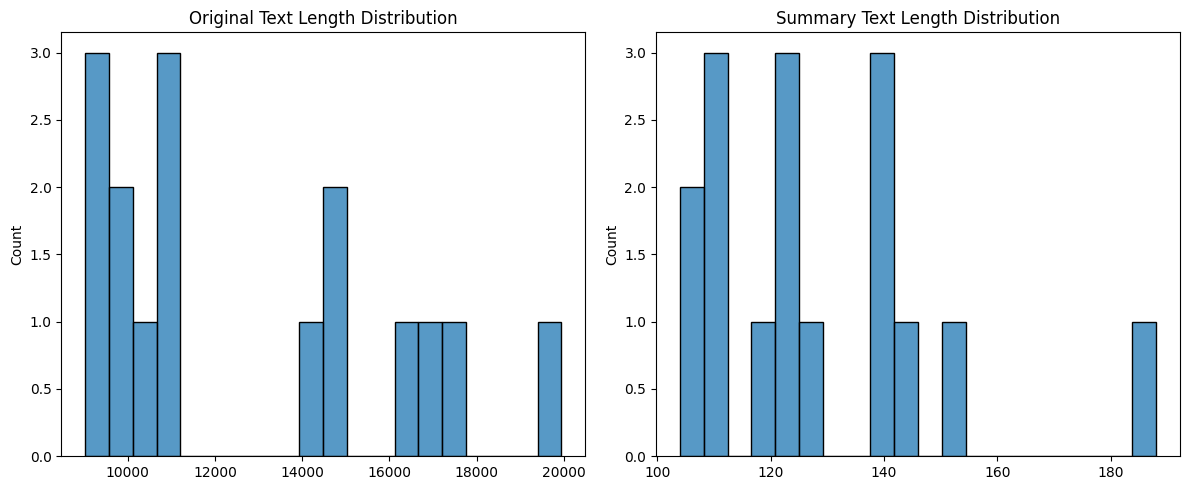

In [52]:
# Filter text length
df_qmsum_filtered = filter_dataframe(df_qmsum_test)

# Plot graph after filter
plot_word_count_statistics(df_qmsum_filtered)
plot_word_length_histograms(df_qmsum_filtered)

# Output filtered data for development
df_qmsum_filtered.to_excel("../Data/qmsum_test.xlsx", index=False)

(15, 2)
           Min          Mean    Max  Count
Original  8386  12757.933333  24169     15
Summary    106    127.466667    188     15


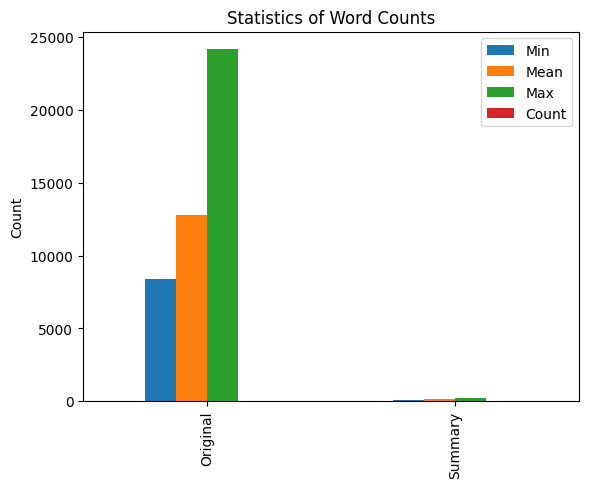

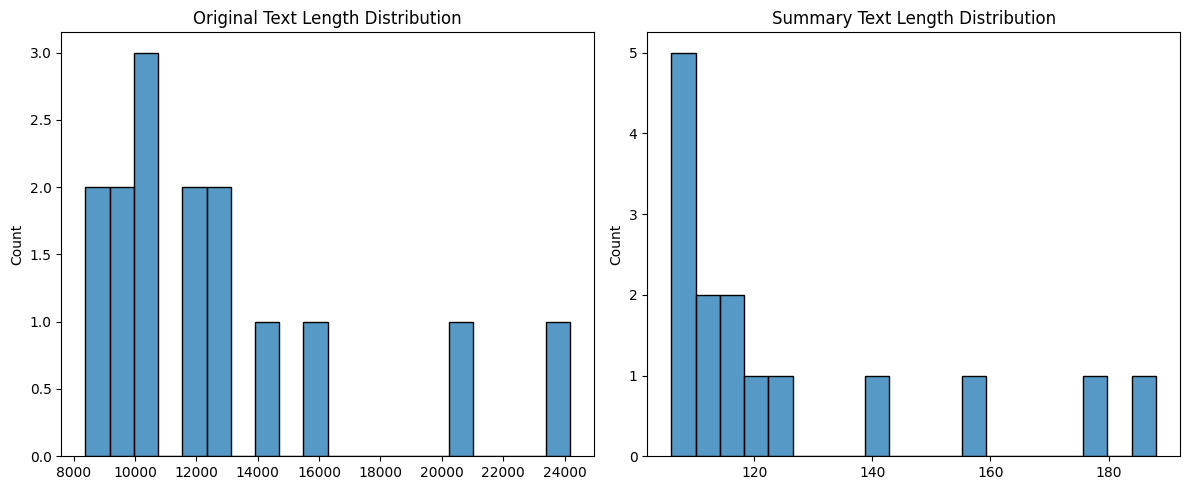

In [53]:
# Filter text length
df_qmsum_filtered = filter_dataframe(df_qmsum_val)

# Plot graph after filter
plot_word_count_statistics(df_qmsum_filtered)
plot_word_length_histograms(df_qmsum_filtered)

# Output filtered data for development
df_qmsum_filtered.to_excel("../Data/qmsum_val.xlsx", index=False)

### BBC DATASET

In [61]:
# Filter function to retrieve ideal length of transcript and summary
# Every Dataset have different data so length of text have to adapt to it.
def filter_dataframe(df):
    text_lengths = df['transcript'].apply(lambda x: len(x.split(" ")))
    summary_lengths = df['summary'].apply(lambda x: len(x.split(" ")))

    filtered_df = df[(text_lengths > 500) & (summary_lengths > 100) & (summary_lengths < 300)]
    return filtered_df.reset_index(drop=True)

(217, 5)
          Min        Mean  Max  Count
Original  497  575.548387  772    217
Summary   174  247.382488  299    217


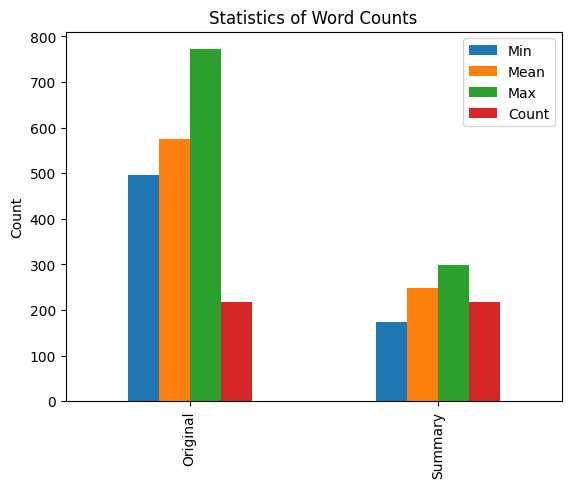

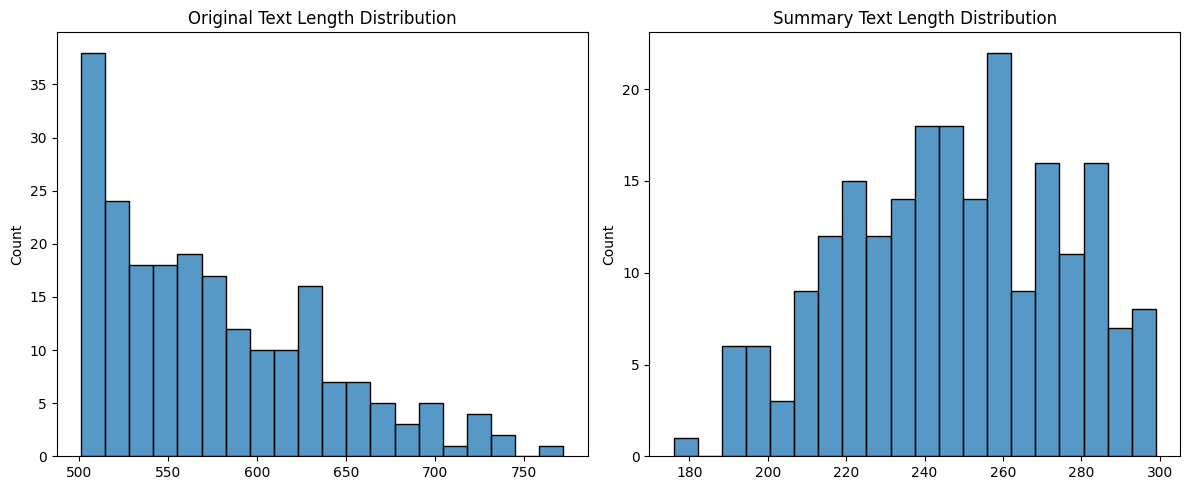

In [66]:
# Filter text length
df_bbc_filtered = filter_dataframe(df_bbc_train)

# Plot graph after filter
plot_word_count_statistics(df_bbc_filtered)
plot_word_length_histograms(df_bbc_filtered)

# Output filtered data for development
df_bbc_filtered.to_excel("../Data/newsbbc_train.xlsx", index=False)

(38, 5)
          Min        Mean  Max  Count
Original  507  595.710526  734     38
Summary   207  251.789474  296     38


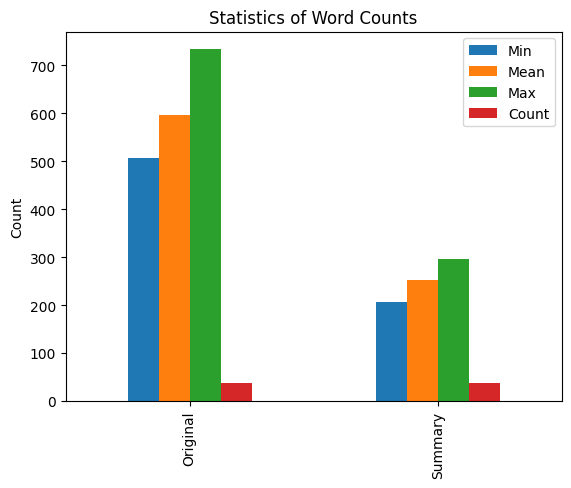

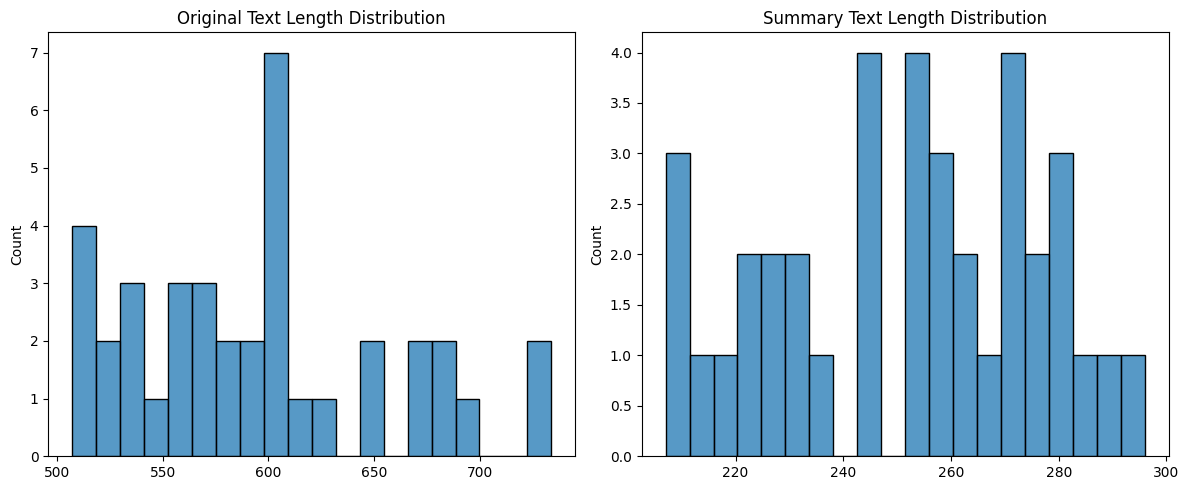

In [64]:
# Filter text length
df_bbc_filtered = filter_dataframe(df_bbc_test)

# Plot graph after filter
plot_word_count_statistics(df_bbc_filtered)
plot_word_length_histograms(df_bbc_filtered)

# Output filtered data for development
df_bbc_filtered.to_excel("../Data/newsbbc_test.xlsx", index=False)

(51, 5)
          Min        Mean  Max  Count
Original  503  582.568627  723     51
Summary   189  247.960784  298     51


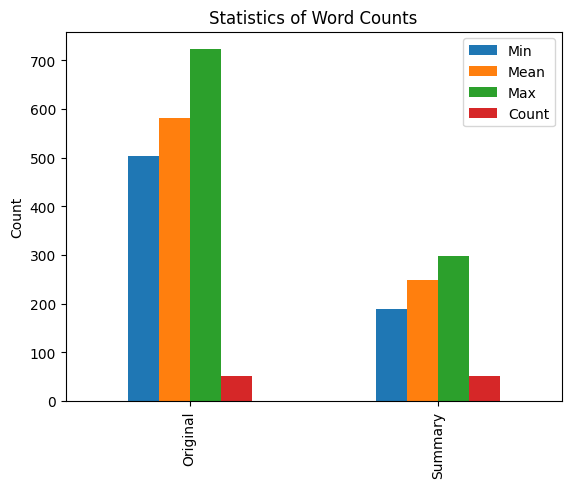

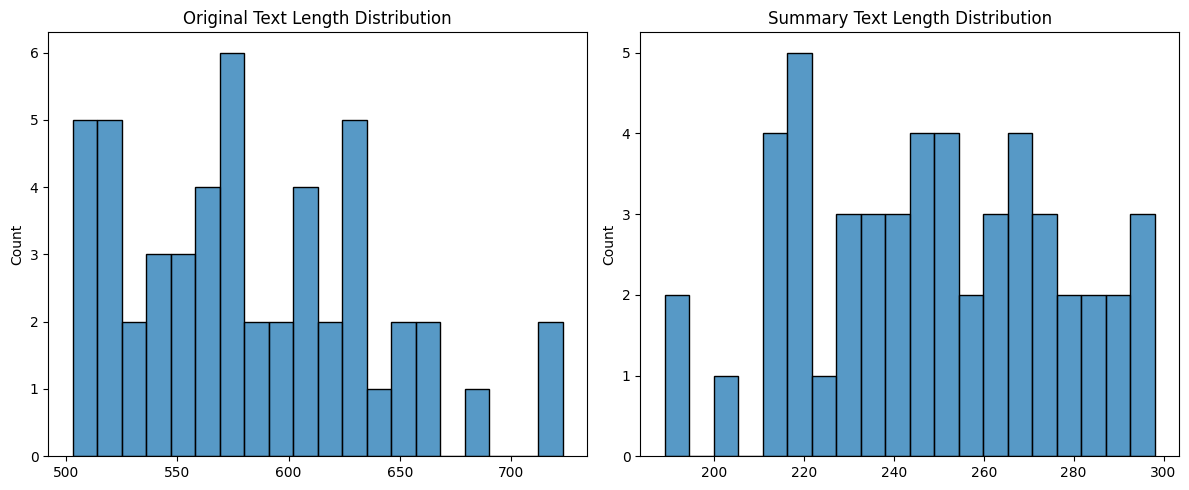

In [65]:
# Filter text length
df_bbc_filtered = filter_dataframe(df_bbc_val)

# Plot graph after filter
plot_word_count_statistics(df_bbc_filtered)
plot_word_length_histograms(df_bbc_filtered)

# Output filtered data for development
df_bbc_filtered.to_excel("../Data/newsbbc_val.xlsx", index=False)

#### Actual Sample Dataset Exploration

Explore transcript extracted from previous developer and observe similar transcript that will be dealing with.

In [43]:
folder_path = r'..\..\Fine-Tune and Evaluations\00data'

# Initialize an empty list to store the text data
all_transcript_data = []

# Loop through each file in the folder
for filename in os.listdir(folder_path):
    if filename.endswith(".txt"):  # Assuming all files are text files
        file_path = os.path.join(folder_path, filename)
        
        # Read the text from the file
        with  open(file_path, 'r', encoding='latin-1') as file:
            transcript = file.read()
        
        # Append the text and filename to the list
        all_transcript_data.append({'filename': filename, 'transcript': transcript})

# Create a DataFrame from the list
df = pd.DataFrame(all_transcript_data)

# Display the DataFrame
df.head()

,filename,transcript
0,Asia Voices Perspectives on Tax Policy Seminar...,Welcome back to the panel discussion at this ...
1,Asia Voices Perspectives on Tax Policy Seminar...,So next up we have three paper presentations ...
2,IPS Forum on Platform Workers Research Researc...,"Thank you, Daniel. First, let me thank everyo..."
3,IPS Online Forum on Corporate Policies and Cul...,The And welcome to the Institute of Policy St...
4,IPS Online Forum on Sustainability and Liveabi...,Hi everyone and welcome to today's forum whic...
5,IPS Online Forum on Well-Being and Belonging.txt,Hello everyone and welcome to the first of th...
6,IPS-Nathan Lectures by Dr Noeleen Heyzer - Lec...,Good afternoon ladies and gentlemen. It is my...
7,IPS-Nathan Lectures by Dr Noeleen Heyzer - Lec...,Good afternoon ladies and gentlemen. It is my...
8,IPS-Nathan Lectures by Dr Noeleen Heyzer - Lec...,"Good afternoon ladies and gentlemen, it is my..."
9,IPS-Nathan Lectures by Mr Patrick Daniel - Lec...,I'm Pleasure to welcome you to this year's IP...


BY WORDS

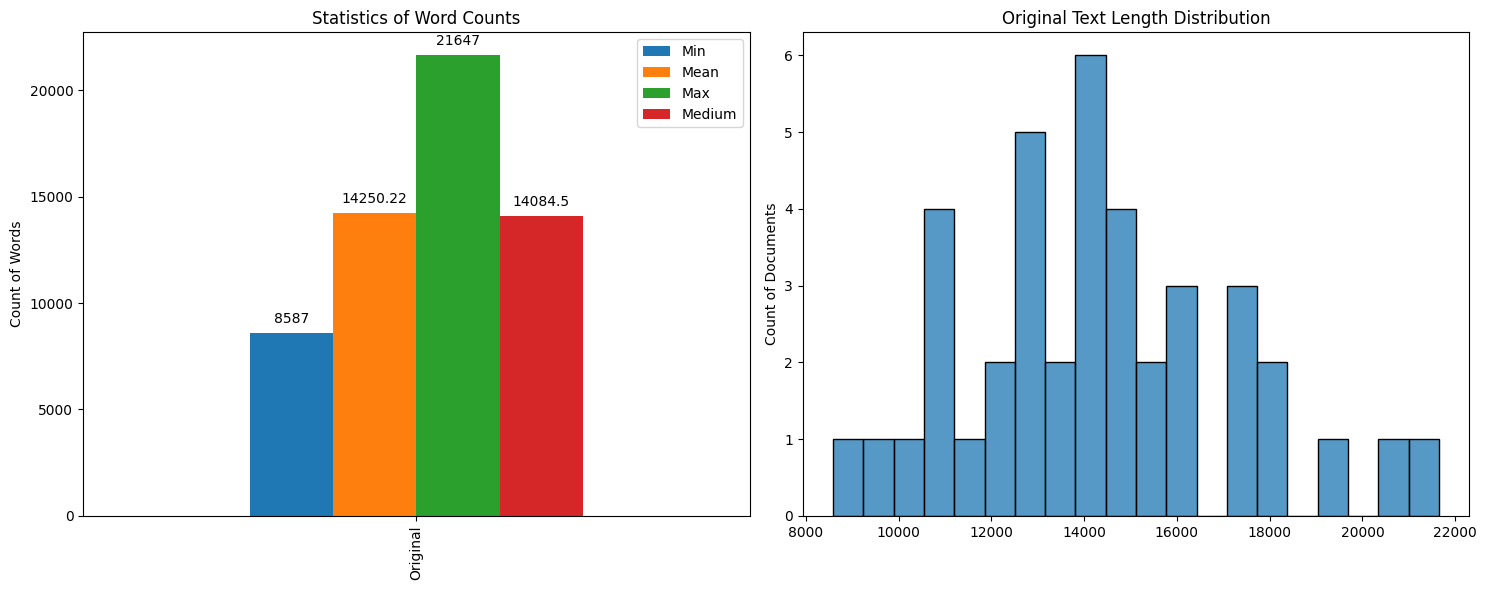

In [44]:
# Assuming df['transcript'] contains the text data
text_lengths = [len(x.split(" ")) for x in df['transcript']]

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot the histogram
sns.histplot(text_lengths, bins=20, ax=axes[1])
axes[1].set_title("Original Text Length Distribution")
axes[1].set_ylabel('Count of Documents')

# Plot the bar chart
text_word_counts = df['transcript'].str.split().apply(len)
text_stats = {
    'Min': text_word_counts.min(),
    'Mean': text_word_counts.mean(),
    'Max': text_word_counts.max(),
    'Medium': text_word_counts.median(),
}

text_df = pd.DataFrame(text_stats, index=['Original'])
bar_plot = text_df.plot(kind='bar', ax=axes[0])
axes[0].set_ylabel('Count of Words')
axes[0].set_title('Statistics of Word Counts')


for p in bar_plot.patches:
    bar_plot.annotate(str(round(p.get_height(), 2)), (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='center', xytext=(0, 10), textcoords='offset points')


# Adjust layout and show the plots
plt.tight_layout()
plt.show()

BY CHARS

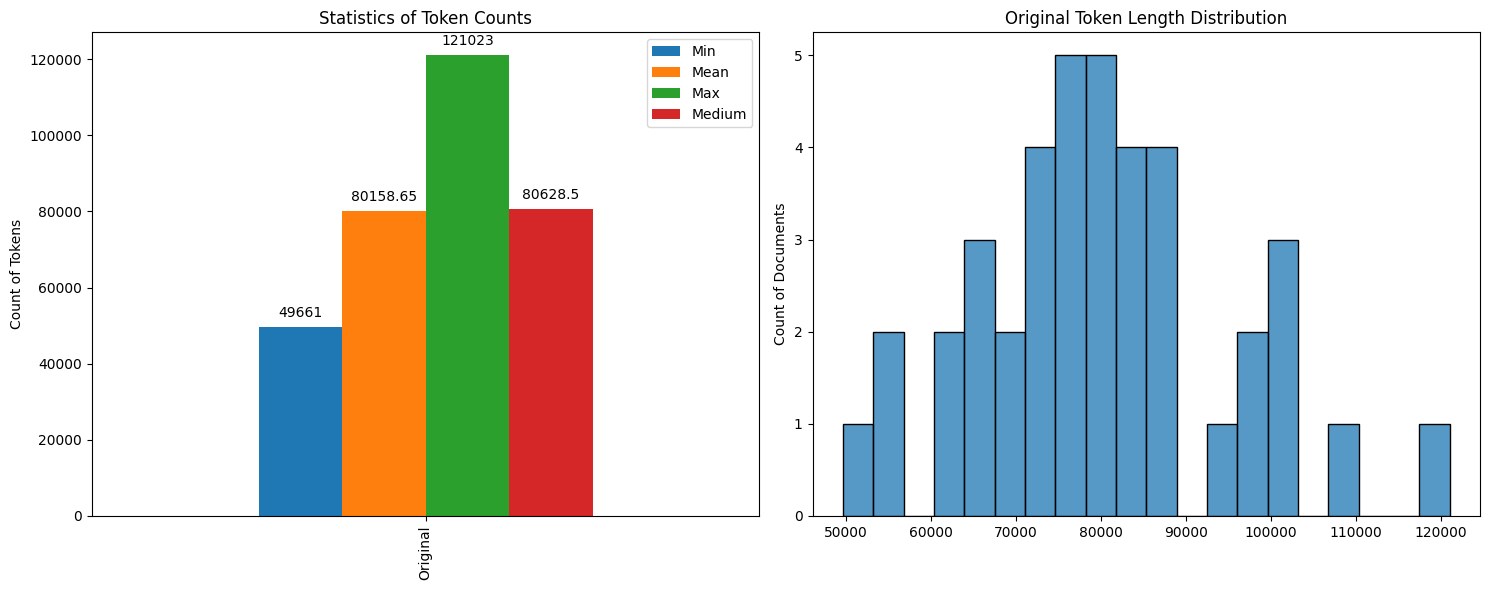

In [45]:
# Assuming df['transcript'] contains the text data
text_lengths = [len(x) for x in df['transcript']]

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot the histogram
sns.histplot(text_lengths, bins=20, ax=axes[1])
axes[1].set_title("Original Token Length Distribution")
axes[1].set_ylabel('Count of Documents')

# Plot the bar chart
text_word_counts = df['transcript'].apply(len)
text_stats = {
    'Min': text_word_counts.min(),
    'Mean': text_word_counts.mean(),
    'Max': text_word_counts.max(),
    'Medium': text_word_counts.median(),

}

text_df = pd.DataFrame(text_stats, index=['Original'])
bar_plot = text_df.plot(kind='bar', ax=axes[0])
axes[0].set_ylabel('Count of Tokens')
axes[0].set_title('Statistics of Token Counts')


for p in bar_plot.patches:
    bar_plot.annotate(str(round(p.get_height(), 2)), (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='center', xytext=(0, 10), textcoords='offset points')


# Adjust layout and show the plots
plt.tight_layout()
plt.show()